In [2]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import ADFTest
import pmdarima as pm
from sklearn.metrics import r2_score
from pmdarima.arima import auto_arima

In [4]:
from pmdarima.model_selection import train_test_split

In [3]:
final_sales = pd.read_csv("/data/p_dsi/teams2023/team7/final_sales.csv")
final_sales['DATE'] = pd.to_datetime(final_sales['DATE'])
final_sales["YEAR_MONTH"] = final_sales["DATE"].dt.to_period("M")
total_units_monthly = final_sales.groupby(by = "YEAR_MONTH").size()
total_units_monthly.index = total_units_monthly.index.astype(str)

In [4]:
total_units_monthly

YEAR_MONTH
2015-04    225950
2015-05    247282
2015-06    247202
2015-07    254688
2015-08    255286
2015-09    248921
2015-10    259468
2015-11    260339
2015-12    236139
2016-01    241597
2016-02    241927
2016-03    267867
2016-04    270547
2016-05    293186
2016-06    312946
2016-07    325872
2016-08    329831
2016-09    325460
2016-10    330329
2016-11    333509
2016-12    333771
2017-01    306491
2017-02    288301
2017-03    331153
2017-04    317162
2017-05    334504
2017-06    336768
2017-07    330261
2017-08    366765
2017-09    343073
2017-10    368703
2017-11    365793
2017-12    354884
2018-01    338678
2018-02    327002
2018-03    382668
2018-04    338357
2018-05    368632
2018-06    378485
2018-07    369366
2018-08    374094
2018-09    366482
2018-10    369539
dtype: int64

In [5]:
train = total_units_monthly[:33]
test = total_units_monthly[-10:]

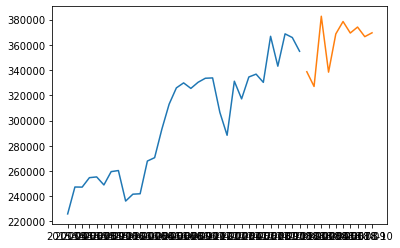

In [6]:
plt.plot(train)
plt.plot(test)

In [7]:
test

YEAR_MONTH
2018-01    338678
2018-02    327002
2018-03    382668
2018-04    338357
2018-05    368632
2018-06    378485
2018-07    369366
2018-08    374094
2018-09    366482
2018-10    369539
dtype: int64

In [8]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(total_units_monthly)

(0.32112571718845795, True)

In [29]:
results = adfuller(total_units_monthly)
results

(-1.226277808032329,
 0.6621907625912455,
 1,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 718.4433729541681)

/home/wuy63/.local/lib/python3.9/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


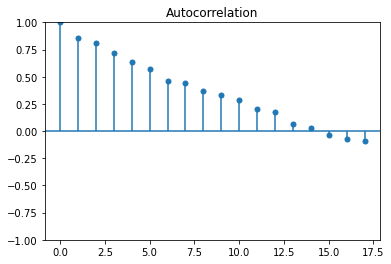

In [9]:
pm.plot_acf(total_units_monthly)

In [26]:
df_stationary = train.diff().dropna()

In [27]:
df_stationary

YEAR_MONTH
2015-05    21332.0
2015-06      -80.0
2015-07     7486.0
2015-08      598.0
2015-09    -6365.0
2015-10    10547.0
2015-11      871.0
2015-12   -24200.0
2016-01     5458.0
2016-02      330.0
2016-03    25940.0
2016-04     2680.0
2016-05    22639.0
2016-06    19760.0
2016-07    12926.0
2016-08     3959.0
2016-09    -4371.0
2016-10     4869.0
2016-11     3180.0
2016-12      262.0
2017-01   -27280.0
2017-02   -18190.0
2017-03    42852.0
2017-04   -13991.0
2017-05    17342.0
2017-06     2264.0
2017-07    -6507.0
2017-08    36504.0
2017-09   -23692.0
2017-10    25630.0
2017-11    -2910.0
2017-12   -10909.0
dtype: float64

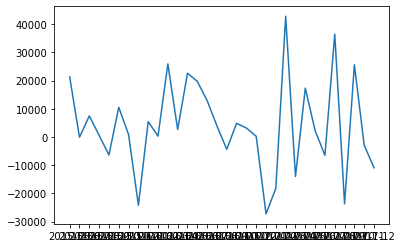

In [29]:
plt.plot(df_stationary)

In [30]:
df_stationary2 = df_stationary.diff().dropna()

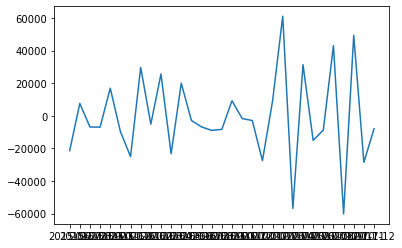

In [31]:
plt.plot(df_stationary2)

In [10]:
# fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(train, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=452.718, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=448.781, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=451.816, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=451.755, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=450.026, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=449.993, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=450.177, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=450.102, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=451.152, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=450.343, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.467 seconds


In [22]:
# fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(train, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d = 0, D = 1,
                             star_d=1, start_D=1, max_d = 3, max_D = 3, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=470.998, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=485.309, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=470.008, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=484.011, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=522.784, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=495.924, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=471.732, Time=0.86 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=471.706, Time=0.28 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=480.205, Time=0.30 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=472.512, Time=2.05 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=484.573, Time=0.10 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=469.198, Time=0.28 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=499.451, Time=0.25 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=470.479, Time=0.77 sec
 ARIMA(2,0,0)(1,1,1)[12] intercep

In [23]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   33
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -229.599
Date:                            Sun, 19 Mar 2023   AIC                            469.198
Time:                                    01:57:59   BIC                            474.420
Sample:                                04-01-2015   HQIC                           470.331
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7557.0494   8883.785      0.851      0.395   -9854.848     2.5e+04
ar.L1          0.0308      0.300      0.103      0.918      -0.558       0.619
ar.L2         -0.1195      0.154     -0.778      0.437      -0.421       0.182
ar.S.L12       0.2577      0.049      5.313      0.000       0.163       0.353
sigma2      2.591e+08      0.000   5.61e+11      0.000    2.59e+08    2.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.00
Prob(Q):                              0.78   Prob(JB):                         0.61
Heteroskedasticity (H):               7.46   Skew:                             0.51
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.6e+30. Standard errors may be unstable.
"""

In [141]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -223.390
Date:                            Sat, 18 Mar 2023   AIC                            448.781
Time:                                    01:34:20   BIC                            449.776
Sample:                                04-01-2015   HQIC                           448.975
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       2.42e+08   8.26e+07      2.929      0.003    8.01e+07    4.04e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.13   Prob(JB):                         0.71
Heteroskedasticity (H):               5.67   Skew:                             0.24
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
stepwise_fit2 = pm.auto_arima(train, start_p=3, start_q=3, m=12, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(1,1,1)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=649.989, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=653.243, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=653.168, Time=0.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=651.780, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=651.749, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=653.475, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=651.288, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=651.200, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=651.852, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=651.769, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.705 seconds


In [142]:
prediction = pd.DataFrame(stepwise_fit.predict(n_periods = 10), index = test.index)
prediction.columns = ["predicted_units"]
prediction

,predicted_units
YEAR_MONTH,
2018-01,327604.0
2018-02,309414.0
2018-03,352266.0
2018-04,338275.0
2018-05,355617.0
2018-06,357881.0
2018-07,351374.0
2018-08,387878.0
2018-09,364186.0


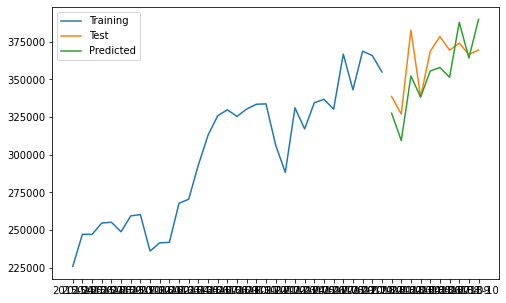

In [146]:
plt.figure(figsize = (8,5))
plt.plot(train, label = "Training")
plt.plot(test, label = "Test")
plt.plot(prediction, label = "Predicted")
plt.legend(loc = "upper left")
plt.show()

In [143]:
results = pd.DataFrame({'test': test, 'prediction': prediction["predicted_units"]})

In [144]:
prediction["predicted_units"]

YEAR_MONTH
2018-01    327604.0
2018-02    309414.0
2018-03    352266.0
2018-04    338275.0
2018-05    355617.0
2018-06    357881.0
2018-07    351374.0
2018-08    387878.0
2018-09    364186.0
2018-10    389816.0
Name: predicted_units, dtype: float64

In [145]:
results

,test,prediction
YEAR_MONTH,,
2018-01,338678,327604.0
2018-02,327002,309414.0
2018-03,382668,352266.0
2018-04,338357,338275.0
2018-05,368632,355617.0
2018-06,378485,357881.0
2018-07,369366,351374.0
2018-08,374094,387878.0
2018-09,366482,364186.0


In [147]:
r2_score(results["test"], results["prediction"])

0.13856807288112472